In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use("seaborn")
sns.set_context("talk")

In [5]:
df = pd.read_csv("data/Taxicab_Trips_Sampling_in_July_2017.csv")

In [6]:
df.drop_duplicates(inplace=True)
df = df.loc[df.TOTALAMOUNT>0]
df = df.loc[df.TOTALAMOUNT<1000]
df = df.loc[df.METERFARE>0]
df = df.loc[df.TRIPMILEAGE>0]
df = df.loc[df.TRIPMILEAGE<100]
df = df.loc[df.TRIPTIME>0]
df = df.loc[df.TRIPTIME<120]
df = df.loc[df.TRIPMILEAGE/df.TRIPTIME<2]
df.AIRPORT = df.AIRPORT == "Y"
df["pickup_quadrant"] = df.PICKUP_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
df["dropoff_quadrant"] = df.DROPOFF_BLOCKNAME.str.extract(r"\s([NS][EW])\b")

df["tip_ratio"] = df.TIP / df.METERFARE
df["tipping"] = (df.TIP>0) * 1 

df['pickup_datetime'] = pd.to_datetime(df.PICKUPDATETIME_TR)
df['dropoff_datetime'] = pd.to_datetime(df.DROPOFFDATETIME_TR)
df['pickup_date'] = df.pickup_datetime.dt.date
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['dropoff_date'] = df.dropoff_datetime.dt.date
df['dropoff_hour'] = df.dropoff_datetime.dt.hour

df = df.drop(["OBJECTID_1", "OBJECTID"], axis=1)

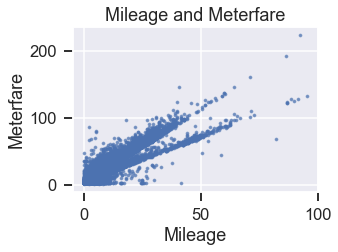

In [7]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.TRIPMILEAGE, 
            df.METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage and Meterfare")
plt.tight_layout()
plt.show()

In [8]:
formula = "METERFARE ~ TRIPMILEAGE"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 4.947e+04
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:32:52   Log-Likelihood:            -5.2565e+05
No. Observations:              201887   AIC:                         1.051e+06
Df Residuals:                  201885   BIC:                         1.051e+06
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.8871      0.026    230.568      0.000       5.837       5.937
TRIPMILEAGE     1.9832      0.009    222.423      0.000       1.966       2.001
==============================================================================
Omnibus:                    89320.280   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14744895.792
Skew:                          -1.057   Prob(JB):                         0.00
Kurtosis:                      44.814   Cond. No.                         6.77
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

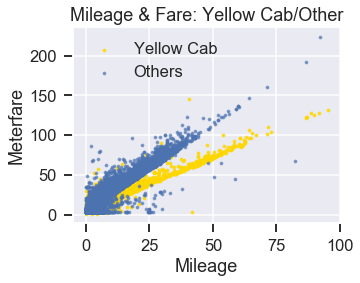

In [9]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.loc[df.PROVIDER=="Yellow Cab of DC"].TRIPMILEAGE, 
            df.loc[df.PROVIDER=="Yellow Cab of DC"].METERFARE, 
            s=5, 
            alpha=0.8,
            c = "gold")
plt.scatter(df.loc[df.PROVIDER!="Yellow Cab of DC"].TRIPMILEAGE, 
            df.loc[df.PROVIDER!="Yellow Cab of DC"].METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage & Fare: Yellow Cab/Other")
plt.legend(["Yellow Cab", "Others"])
plt.show()

In [10]:
df["yellowcab"] = df.PROVIDER == "Yellow Cab of DC"
formula = "METERFARE ~ TRIPMILEAGE * yellowcab"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 6.402e+04
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:33:29   Log-Likelihood:            -4.8790e+05
No. Observations:              201887   AIC:                         9.758e+05
Df Residuals:                  201883   BIC:                         9.759e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         5.4137      0.016    330.727      0.000       5.382       5.446
yellowcab[T.True]                 0.5518      0.037     14.848      0.000       0.479       0.625
TRIPMILEAGE                       2.2449      0.006    376.606      0.000       2.233       2.257
TRIPMILEAGE:yellowcab[T.True]    -0.8324      0.009    -95.467      0.000      -0.850      -0.815
==============================================================================
Omnibus:                    75173.769   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51621740.039
Skew:                          -0.134   Prob(JB):                         0.00
Kurtosis:                      81.337   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [11]:
df.loc[df.PROVIDER=="Yellow Cab of DC", "TRIPMILEAGE"] = df.loc[df.PROVIDER=="Yellow Cab of DC", "TRIPMILEAGE"] / 1.6

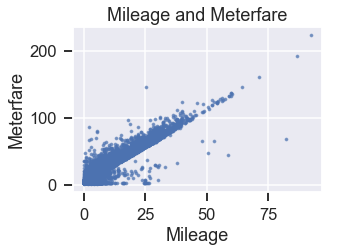

In [12]:
plt.figure(figsize=(4.8, 3.6))
plt.scatter(df.TRIPMILEAGE, 
            df.METERFARE, 
            s=5, 
            alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Meterfare")
plt.title("Mileage and Meterfare")
plt.tight_layout()
plt.show()

In [13]:
formula = "METERFARE ~ TRIPMILEAGE"
model = smf.ols(formula, df).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              METERFARE   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.747e+05
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:37:22   Log-Likelihood:            -4.8830e+05
No. Observations:              201887   AIC:                         9.766e+05
Df Residuals:                  201885   BIC:                         9.766e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.4543      0.015    363.281      0.000       5.425       5.484
TRIPMILEAGE     2.2488      0.005    417.983      0.000       2.238       2.259
==============================================================================
Omnibus:                    75213.477   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51888022.267
Skew:                          -0.134   Prob(JB):                         0.00
Kurtosis:                      81.538   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

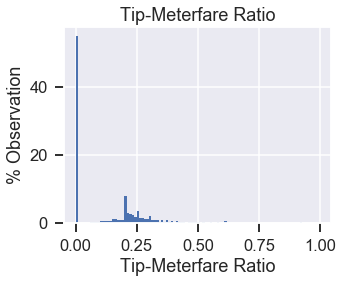

In [16]:
plt.figure(figsize=(4.8, 3.6))
df.loc[df.tip_ratio<1].tip_ratio.hist(bins=100, density=True)
plt.title("Tip-Meterfare Ratio")
plt.xlabel("Tip-Meterfare Ratio")
plt.ylabel("% Observation")
plt.show()

In [18]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit1 = smf.logit(formula, df).fit(cov_type="HC1")
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.219913
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                tipping   No. Observations:               201887
Model:                          Logit   Df Residuals:                   201844
Method:                           MLE   Df Model:                           42
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.6810
Time:                        22:05:51   Log-Likelihood:                -44398.
converged:                       True   LL-Null:                   -1.3916e+05
                                        LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.0970      0.173    -23.731      0.000      -4.435      -3.759
AIRPORT[T.True]                                  0.5307      0.032     16.775      0.000       0.469       0.593
C(PAYMENTTYPE)[T.CreditCard]                     7.1355      0.049    145.551      0.000       7.039       7.232
C(PAYMENTTYPE)[T.Voucher]                        6.4638      0.245     26.350      0.000       5.983       6.945
C(pickup_date)[T.datetime.date(2017, 7, 24)]     0.3763      0.036     10.578      0.000       0.307       0.446
C(pickup_date)[T.datetime.date(2017, 7, 25)]     0.5049      0.035     14.487      0.000       0.437       0.573
C(pickup_date)[T.datetime.date(2017, 7, 26)]     0.5619      0.034     16.313      0.000       0.494       0.629
C(pickup_date)[T.datetime.date(2017, 7, 27)]     0.5488      0.034     15.999      0.000       0.482       0.616
C(pickup_date)[T.datetime.date(2017, 7, 28)]     0.3070      0.035      8.842      0.000       0.239       0.375
C(pickup_date)[T.datetime.date(2017, 7, 29)]    -0.0436      0.038     -1.148      0.251      -0.118       0.031
C(pickup_hour)[T.1]                             -0.1752      0.094     -1.862      0.063      -0.360       0.009
C(pickup_hour)[T.2]                             -0.1738      0.096     -1.802      0.072      -0.363       0.015
C(pickup_hour)[T.3]                             -0.3097      0.116     -2.668      0.008      -0.537      -0.082
C(pickup_hour)[T.4]                             -0.6595      0.127     -5.210      0.000      -0.908      -0.411
C(pickup_hour)[T.5]                             -0.5112      0.117     -4.361      0.000      -0.741      -0.281
C(pickup_hour)[T.6]                             -0.4806      0.094     -5.100      0.000      -0.665      -0.296
C(pickup_hour)[T.7]                             -0.3412      0.077     -4.441      0.000      -0.492      -0.191
C(pickup_hour)[T.8]                             -0.1746      0.071     -2.469      0.014      -0.313      -0.036
C(pickup_hour)[T.9]                             -0.0163      0.068     -0.238      0.812      -0.151       0.118
C(pickup_hour)[T.10]                            -0.1025      0.068     -1.501      0.133      -0.236       0.031
C(pickup_hour)[T.11]                             0.1497      0.067      2.239      0.025       0.019       0.281
C(pickup_hour)[T.12]                             0.0372      0.067      0.559      0.576      -0.093       0.168
C(pickup_hour)[T.13]                             0.1467      0.067      2.202      0.028       0.016       0.277
C(pickup_hour)[T.14]                             0.0411      0.067      0.613      0.540      -0.090       0.172
C(pickup_hour)[T.15]                            -0.0093      0.067     -0.139      0.889      -0.140       0.122
C(pickup_hour)[T.16]                             0.0268      0.067      0.400

In [19]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit2 = smf.logit(formula, df).fit(cov_type="HC1")
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.210573
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                tipping   No. Observations:               159046
Model:                          Logit   Df Residuals:                   159000
Method:                           MLE   Df Model:                           45
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.6941
Time:                        22:06:34   Log-Likelihood:                -33491.
converged:                       True   LL-Null:                   -1.0950e+05
                                        LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.1695      0.195    -21.410      0.000      -4.551      -3.788
AIRPORT[T.True]                                  0.4797      0.052      9.235      0.000       0.378       0.582
C(PAYMENTTYPE)[T.CreditCard]                     7.2910      0.057    127.429      0.000       7.179       7.403
C(PAYMENTTYPE)[T.Voucher]                        6.6496      0.280     23.708      0.000       6.100       7.199
C(dropoff_quadrant)[T.NW]                        0.2177      0.032      6.818      0.000       0.155       0.280
C(dropoff_quadrant)[T.SE]                        0.1340      0.050      2.704      0.007       0.037       0.231
C(dropoff_quadrant)[T.SW]                        0.1058      0.048      2.215      0.027       0.012       0.199
C(pickup_date)[T.datetime.date(2017, 7, 24)]     0.3683      0.042      8.805      0.000       0.286       0.450
C(pickup_date)[T.datetime.date(2017, 7, 25)]     0.4820      0.041     11.713      0.000       0.401       0.563
C(pickup_date)[T.datetime.date(2017, 7, 26)]     0.5324      0.041     13.092      0.000       0.453       0.612
C(pickup_date)[T.datetime.date(2017, 7, 27)]     0.5258      0.041     12.955      0.000       0.446       0.605
C(pickup_date)[T.datetime.date(2017, 7, 28)]     0.2795      0.041      6.823      0.000       0.199       0.360
C(pickup_date)[T.datetime.date(2017, 7, 29)]    -0.0901      0.045     -2.017      0.044      -0.178      -0.003
C(pickup_hour)[T.1]                             -0.1694      0.108     -1.570      0.116      -0.381       0.042
C(pickup_hour)[T.2]                             -0.1241      0.113     -1.095      0.274      -0.346       0.098
C(pickup_hour)[T.3]                             -0.2200      0.152     -1.443      0.149      -0.519       0.079
C(pickup_hour)[T.4]                             -0.9508      0.211     -4.511      0.000      -1.364      -0.538
C(pickup_hour)[T.5]                             -1.1187      0.206     -5.439      0.000      -1.522      -0.716
C(pickup_hour)[T.6]                             -0.7463      0.126     -5.930      0.000      -0.993      -0.500
C(pickup_hour)[T.7]                             -0.3920      0.090     -4.365      0.000      -0.568      -0.216
C(pickup_hour)[T.8]                             -0.1243      0.082     -1.523      0.128      -0.284       0.036
C(pickup_hour)[T.9]                              0.0009      0.078      0.012      0.990      -0.153       0.155
C(pickup_hour)[T.10]                            -0.1162      0.078     -1.483      0.138      -0.270       0.037
C(pickup_hour)[T.11]                             0.1861      0.077      2.427      0.015       0.036       0.336
C(pickup_hour)[T.12]                             0.0429      0.076      0.562      0.574      -0.107       0.193
C(pickup_hour)[T.13]                             0.1676      0.076      2.194

In [ ]:
plt.figure(figsize=(5, 5.25))

plt.scatter(df.loc[df.tipping==0].DROPOFF_BLOCK_LONGITUDE,
            df.loc[df.tipping==0].DROPOFF_BLOCK_LATITUDE,
            alpha=0.05,
            s=0.5,
            c="gold")
plt.scatter(df.loc[df.tipping==1].DROPOFF_BLOCK_LONGITUDE,
            df.loc[df.tipping==1].DROPOFF_BLOCK_LATITUDE, 
            alpha=0.05, 
            s=0.5,
            c="blue")

plt.xlim(-77.12, -76.90)
plt.ylim(38.80, 39.00)
plt.title("Tipping & Non-Tipping")
plt.legend(["Tipping (blue)", "No-Tipping (yellow)"], loc=4)

plt.xlabel("Longitude")
plt.xticks([-77.1, -77, -76.9])
plt.ylabel("Latitude")
plt.yticks([38.8, 38.9, 39])
plt.tight_layout()
plt.savefig("image/tipping_map")
plt.show()

In [21]:
df["distance_capitol"] = np.sqrt((df.DROPOFF_BLOCK_LATITUDE-38.8899)**2
                                 +(df.DROPOFF_BLOCK_LONGITUDE+77.0091)**2)

In [22]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) \
                     + distance_capitol \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit3 = smf.logit(formula, df).fit(cov_type="HC1")
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.209841
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                tipping   No. Observations:               159046
Model:                          Logit   Df Residuals:                   158999
Method:                           MLE   Df Model:                           46
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.6952
Time:                        22:08:47   Log-Likelihood:                -33374.
converged:                       True   LL-Null:                   -1.0950e+05
                                        LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -4.0193      0.194    -20.728      0.000      -4.399      -3.639
AIRPORT[T.True]                                  0.3777      0.052      7.309      0.000       0.276       0.479
C(PAYMENTTYPE)[T.CreditCard]                     7.2885      0.057    127.181      0.000       7.176       7.401
C(PAYMENTTYPE)[T.Voucher]                        6.6504      0.280     23.783      0.000       6.102       7.198
C(dropoff_quadrant)[T.NW]                        0.3991      0.034     11.682      0.000       0.332       0.466
C(dropoff_quadrant)[T.SE]                        0.1137      0.050      2.293      0.022       0.016       0.211
C(dropoff_quadrant)[T.SW]                        0.1021      0.048      2.141      0.032       0.009       0.196
C(pickup_date)[T.datetime.date(2017, 7, 24)]     0.3564      0.042      8.502      0.000       0.274       0.439
C(pickup_date)[T.datetime.date(2017, 7, 25)]     0.4650      0.041     11.267      0.000       0.384       0.546
C(pickup_date)[T.datetime.date(2017, 7, 26)]     0.5094      0.041     12.498      0.000       0.430       0.589
C(pickup_date)[T.datetime.date(2017, 7, 27)]     0.5052      0.041     12.421      0.000       0.425       0.585
C(pickup_date)[T.datetime.date(2017, 7, 28)]     0.2715      0.041      6.617      0.000       0.191       0.352
C(pickup_date)[T.datetime.date(2017, 7, 29)]    -0.0903      0.045     -2.017      0.044      -0.178      -0.003
C(pickup_hour)[T.1]                             -0.1719      0.108     -1.592      0.111      -0.384       0.040
C(pickup_hour)[T.2]                             -0.1198      0.114     -1.052      0.293      -0.343       0.104
C(pickup_hour)[T.3]                             -0.2098      0.154     -1.362      0.173      -0.512       0.092
C(pickup_hour)[T.4]                             -0.9604      0.208     -4.625      0.000      -1.367      -0.553
C(pickup_hour)[T.5]                             -1.1510      0.205     -5.621      0.000      -1.552      -0.750
C(pickup_hour)[T.6]                             -0.8154      0.126     -6.480      0.000      -1.062      -0.569
C(pickup_hour)[T.7]                             -0.4623      0.090     -5.131      0.000      -0.639      -0.286
C(pickup_hour)[T.8]                             -0.1916      0.082     -2.336      0.019      -0.352      -0.031
C(pickup_hour)[T.9]                             -0.0714      0.079     -0.904      0.366      -0.226       0.083
C(pickup_hour)[T.10]                            -0.1840      0.079     -2.333      0.020      -0.338      -0.029
C(pickup_hour)[T.11]                             0.1090      0.077      1.413      0.158      -0.042       0.260
C(pickup_hour)[T.12]                            -0.0296      0.077     -0.385      0.700      -0.180       0.121
C(pickup_hour)[T.13]                             0.0971      0.077      1.263

In [23]:
formula = "tipping ~ TRIPMILEAGE \
                     + AIRPORT \
                     + C(PAYMENTTYPE) \
                     + C(dropoff_quadrant) * distance_capitol \
                     + C(pickup_date) \
                     + C(pickup_hour) \
                     + C(PROVIDER) \
                     + C(TRIPTYPE)"
logit4 = smf.logit(formula, df).fit(cov_type="HC1")
logit4.summary()

Optimization terminated successfully.
         Current function value: 0.208825
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                tipping   No. Observations:               159046
Model:                          Logit   Df Residuals:                   158996
Method:                           MLE   Df Model:                           49
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.6967
Time:                        22:28:40   Log-Likelihood:                -33213.
converged:                       True   LL-Null:                   -1.0950e+05
                                        LLR p-value:                     0.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -3.6084      0.197    -18.335      0.000      -3.994      -3.223
AIRPORT[T.True]                                  0.3638      0.052      7.058      0.000       0.263       0.465
C(PAYMENTTYPE)[T.CreditCard]                     7.2838      0.057    127.053      0.000       7.171       7.396
C(PAYMENTTYPE)[T.Voucher]                        6.6614      0.279     23.866      0.000       6.114       7.208
C(dropoff_quadrant)[T.NW]                       -0.1447      0.051     -2.838      0.005      -0.245      -0.045
C(dropoff_quadrant)[T.SE]                        0.2189      0.077      2.833      0.005       0.067       0.370
C(dropoff_quadrant)[T.SW]                       -0.1479      0.078     -1.893      0.058      -0.301       0.005
C(pickup_date)[T.datetime.date(2017, 7, 24)]     0.3598      0.042      8.564      0.000       0.277       0.442
C(pickup_date)[T.datetime.date(2017, 7, 25)]     0.4633      0.041     11.187      0.000       0.382       0.544
C(pickup_date)[T.datetime.date(2017, 7, 26)]     0.5042      0.041     12.335      0.000       0.424       0.584
C(pickup_date)[T.datetime.date(2017, 7, 27)]     0.5038      0.041     12.350      0.000       0.424       0.584
C(pickup_date)[T.datetime.date(2017, 7, 28)]     0.2793      0.041      6.777      0.000       0.198       0.360
C(pickup_date)[T.datetime.date(2017, 7, 29)]    -0.0913      0.045     -2.036      0.042      -0.179      -0.003
C(pickup_hour)[T.1]                             -0.1688      0.109     -1.541      0.123      -0.383       0.046
C(pickup_hour)[T.2]                             -0.1230      0.115     -1.073      0.283      -0.348       0.102
C(pickup_hour)[T.3]                             -0.1945      0.156     -1.246      0.213      -0.501       0.111
C(pickup_hour)[T.4]                             -0.9717      0.211     -4.604      0.000      -1.385      -0.558
C(pickup_hour)[T.5]                             -1.2131      0.206     -5.875      0.000      -1.618      -0.808
C(pickup_hour)[T.6]                             -0.8690      0.126     -6.910      0.000      -1.115      -0.622
C(pickup_hour)[T.7]                             -0.4997      0.090     -5.541      0.000      -0.676      -0.323
C(pickup_hour)[T.8]                             -0.2299      0.082     -2.791      0.005      -0.391      -0.068
C(pickup_hour)[T.9]                             -0.1072      0.079     -1.351      0.177      -0.263       0.048
C(pickup_hour)[T.10]                            -0.2152      0.079     -2.717      0.007      -0.370      -0.060
C(pickup_hour)[T.11]                             0.0811      0.077      1.047      0.295      -0.071       0.233
C(pickup_hour)[T.12]                            -0.0505      0.077     -0.655      0.513      -0.202       0.101
C(pickup_hour)[T.13]                             0.0711      0.077      0.923